1 0 0 0 0 1e+30
True


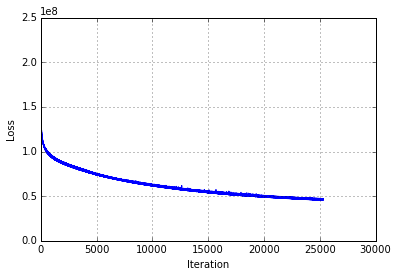

In [34]:
import sys
import glob 
import os

# if len(sys.argv) != 2:
#     print 'Wrong number of args'
#     print 'Arg1: input log file'
#     print 'Arg2: output image file'

# log_file = sys.argv[0]
# img_file = sys.argv[1]

# store data
#log_file='0.00000000001.0.5.10000.0.9.0.0005.10000.same.log'
#log_file='0.00000000001.0.5.10000.0.9.0.0005.10000.winter_summer.log'

gammas=['0.1','0.51']#,'1']
stepsizes=['1000','3000','5000','10000']
weight_decays=['0','0.0005','0.005','0.05']
lr='0.00000000001'
momentum='0.9'
max_iter='10000'
iterations=['2000','4000','6000','8000','10000']
            
min_loss=1e30
min_gamma=0
min_decay=0
min_iter=0
min_step=0
min_trainLoss=0
min_trainIter=0
min_file=''
#Find out parameter with the lowest loss
READ=True
cur_num=0
#for gamma in gammas:
#  for stepsize in stepsizes:
#     for weight_decay in weight_decays:
#         for iteration in iterations:

cur_num += 1
print cur_num,min_gamma,min_decay,min_iter,min_step,min_loss
#suffix='%s.%s.%s.%s.%s.%s'%(lr,gamma,stepsize,momentum,
#                                      weight_decay,iteration)
#logfiles=glob.glob('/tmp/finetune_net.bin.tibet2.tgebru.log.INFO.*')
#numlogs = len(logfiles)
#for log_file in logfiles:
#log_file='0.00000000001.0.5.10000.0.9.0.005.50000.winter_summer.log'
log_file='finetune_net.bin.tibet2.tgebru.log.INFO.20150905-142400.3807'

#print 'processing %d out of %d'%(cur_num,numlogs)
try:
    log_handle = open(log_file, 'r')
    READ=True
except:
    READ=False
    pass
print READ
if READ:
    trainIter = []
    trainLoss = []
    trainRecall = []

    testIter = []
    testRecall = []

    iteration = 0 
    testing = False
    testIt = 0
    TEST_INTERVAL=1000
    for line in log_handle:
        #testing
        if (iteration + 1) % TEST_INTERVAL == 0: 
            testIt += 1

        # training
        else:
            # loss
            iter_index = line.find('Iteration')
            loss_index = line.find('total loss')
            if iter_index >=0 and loss_index >=0:
                line = line[iter_index:]
                fields = line.strip().split(',')
                iteration = int(fields[0].split(' ')[1])
                trainIter.append(iteration)
                try:
                    trainLoss.append(float(fields[1].split(' ')[-1]))
                except:
                    pass

        iteration += 1     
                    #print 'Iteration %d, testing %d' %(iteration, testIt)


    log_handle.close()
    '''
    if trainLoss:
      if min(trainLoss) < min_loss and min(trainLoss)>1e5:
        min_loss=min(trainLoss)
        min_gamma=gamma
        min_decay=weight_decay
        min_iter=iteration
        min_step=stepsize 
        min_trainLoss=trainLoss
        min_trainIter=trainIter
        min_file=log_file
    '''

# visualize loss
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
lns1 = ax1.plot(trainIter, trainLoss, 'b', label = 'Training loss')
ax1.set_xlabel('Iteration')
#ax1.set_ylim((0, 20))
ax1.set_ylabel('Loss')
#ax2 = ax1.twinx()
lns = lns1
labs = [l.get_label() for l in lns]
#title_str = 'Iter=%d, loss=%.2f, min_loss=%.2f, gamma=%.2f, iter=%d, decay=%.2f, step=%.2f'%(min_trainIter[-1], min_trainLoss[-1]
#                       min_loss=%.2f, gamma=%.2f, iter=%d, decay=%.2f, step=)
#ax1.set_title(title_str)
ax1.grid()

plt.show()
save_dir='./loss_plots/'
img_file=os.path.join(save_dir,log_file.split('.')[0])
fig.savefig(img_file, bbox_inches='tight')

In [60]:
print min_loss, min_file, min_iter,min_step,min_gamma,min_decay,min(min_trainLoss)

114158000.0 0.00000000001.0.5.10000.0.9.0.005.10000.summer_winter.log 10007 10000 0.51 0.05 114158000.0


In [47]:
min(trainLoss), np.argmin(trainLoss)

(78046100.0, 5516)

In [23]:
trainLoss[0:10]

[318392000.0,
 106772000000.0,
 55046400000000.0,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

9990